In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_state_city
import json
import requests 
from json_tricks import loads

In [2]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')

c = ClassicalRegister(3, 'c')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q,c)

In [3]:
circ.z(q[0])
circ.h(q[0])
circ.x(q[2])

#circ.measure(q,c)

In [4]:
circ.draw()

In [5]:
test_json = {
  "qasm": "",
  "backend": "statevector_simulator"
}

In [6]:
test_json['qasm'] = circ.qasm()
test_json

{'qasm': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nz q[0];\nh q[0];\nx q[2];\n',
 'backend': 'statevector_simulator'}

In [7]:
URL = "http://localhost:5000/api/run/statevector"

r = requests.post(url=URL, json=test_json)

In [8]:
r.status_code

200

In [9]:
r.json()

{'__ndarray__': [{'__complex__': [0.0, 0.0]},
  {'__complex__': [0.0, 0.0]},
  {'__complex__': [0.0, 0.0]},
  {'__complex__': [0.0, 0.0]},
  {'__complex__': [0.707, 0.0]},
  {'__complex__': [0.707, 0.0]},
  {'__complex__': [0.0, 0.0]},
  {'__complex__': [0.0, 0.0]}],
 'dtype': 'complex128',
 'shape': [8]}

In [10]:
outputstate = loads(json.dumps(r.json()))  # recover complex statevector ndarray from json string

[0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j
 0.   +0.j]


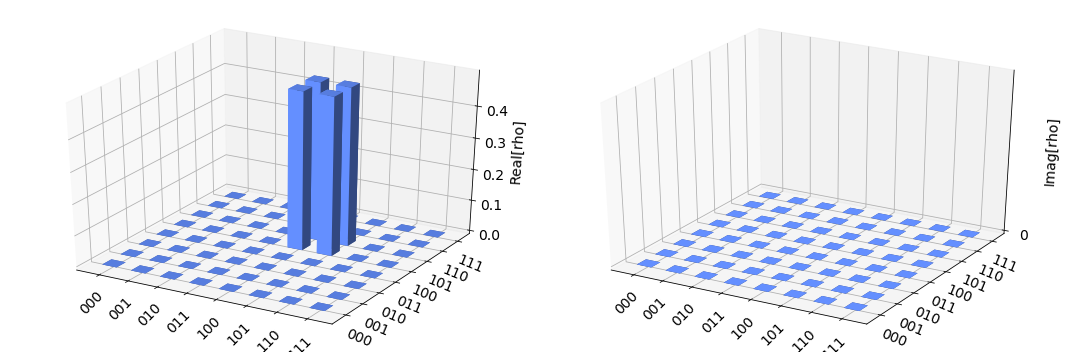

In [11]:
print(outputstate)
plot_state_city(outputstate)

In [12]:
circ.measure(q,c)
circ.draw()

In [13]:
test_json = {
  "qasm": "",
  "backend": "statevector_simulator"
}

In [14]:
test_json['qasm'] = circ.qasm()
test_json

{'qasm': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nz q[0];\nh q[0];\nx q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n',
 'backend': 'statevector_simulator'}

In [12]:
URL = "http://localhost:5000/api/run/qasm"

r = requests.post(url=URL, json=test_json)

In [13]:
r.status_code

200

In [14]:
r.json()

{'result': {'000': 1}}